<a href="https://colab.research.google.com/github/Jxiang2/CMPUT340_ScientificComputation/blob/main/Non_linearLestSquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

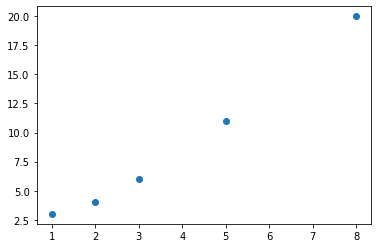

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def g(x1, x2, t):
  return x1 * np.exp(x2*t)

t = np.array([1,2,3,5,8])
y = np.array([3,4,6,11,20])

t_range = np.arange(1,8,0.1)
y_range = np.arange(2.5, 20, 0.1)

plt.plot(t, y, 'o')

In [9]:
#A = np.array([np.ones((len(y))),t*2,t**2]).T
#print(A)

Linear Least Square

2.4374359263209158 0.27450318320181344


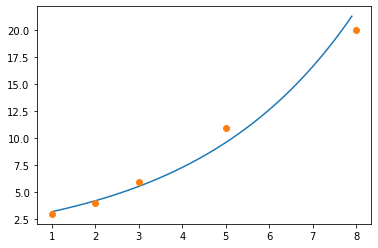

In [10]:
import copy

def forward_substituion(L, b):
  x = np.zeros(L.shape[0])
  n = len(x)
  
  for j in range(0, n ):
    if L[j][j] == 0:
      return None
    x[j] = b[j] / L[j][j]

    for i in range(j+1, n):
      b[i] = b[i] - L[i][j] * x[j]
    
  return x

def back_substituion(U, b):
  x = np.zeros(U.shape[0])
  n = len(x)
  
  for j in range(n - 1, -1, -1):
    if U[j][j] == 0:
      return None
    x[j] = b[j] / U[j][j] 

    for i in range(0, j):
      b[i] = b[i] - U[i][j] * x[j]

  return x
      
'''
def lu_factor_v1(A):
  M = np.identity(A.shape[0])
  n = A.shape[0]
  
  for k in range(0, n-1):
    if A[k][k] == 0:
      return None

    for i in range(k+1, n):
      M[i][k] = A[i][k]/A[k][k]
  
    for j in range(k, n):
      for i in range(k+1, n):
        A[i][j] = A[i][j] - M[i][k] * A[k][j]
'''

def lu_factor_v2(A):
  L = np.identity(A.shape[0])
  n = A.shape[0]

  for k in range(0, n-1):
    if A[k][k] == 0:
      return None

    c = np.concatenate((np.zeros(k+1), A[k+1: n, k])).reshape((n,1))
    c = c/A[k][k]

    M = np.identity(A.shape[0])
    M[:, k] -= c[:,0]
    L[:, k] += c[:,0]
    A = M.dot(A)

  return L, A

log_y = np.log(y)

#ln(y) = a + bt
A = np.array([np.ones((len(y))),t]).T
#print(A)
A_T = A.T.dot(A)
b = A.T.dot(log_y)

L, U = lu_factor_v2(copy.deepcopy(A_T))
#print(L)
#print(U)
c = forward_substituion(L, copy.deepcopy(b))
x = back_substituion(U, c)
#print(x)

x1 = np.exp(x[0])
x2 = x[1]
print(x1, x2)

y_pred = g(x1, x2, t_range)
plt.plot(t_range, y_pred)
plt.plot(t, y, 'o')

Non-Linear Least Square by Gadient Descent

[2.67281503 0.25420112]


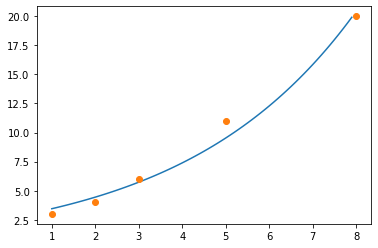

In [11]:
'''
def gradient(t, y, x1, x2):
  der_x1 = np.sum((x1 * np.exp(x2 * t) - y) * np.exp(x2 * t)) # sum for elements in (t, y) pairs
  der_x2 = np.sum((x1 * np.exp(x2 * t) - y) * x1 * np.exp(x2 * t) * t) # sum for elements in (t, y) pairs
  return np.array([der_x1, der_x2])
'''
def jacobian(t, y, x1, x2):
  # compute der_x1, der_x2 for every elements in array t, which are the inputs
  der_x1 = np.exp(x2 * t)
  der_x2 = x1 * np.exp(x2 * t) * t

  J = np.array([der_x1, der_x2])
  return J

def residual(t, y, x1, x2):
  return np.array([x1 * np.exp(x2 * t) - y]).T

alpha = 0.00001
x0 = np.array([2.5, 0.5])
#print(x0.shape)

for _ in range(10000):
  J = jacobian(t, y, x0[0], x0[1])
  R = residual(t, y, x0[0], x0[1])

  x0 += (-1) * alpha * J.dot(R).reshape(2,)

print(x0)
y_pred = g(x0[0], x0[1], t_range)
plt.plot(t_range, y_pred)
plt.plot(t, y, 'o')


Non-Linear Least Square by Guass-Newton

[2.87616878 0.24438423]


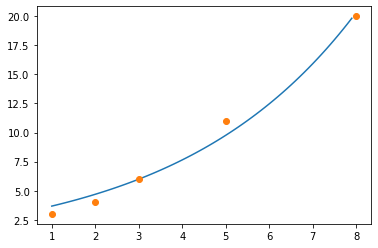

In [12]:
def jacobian(t, y, x1, x2):
  # compute der_x1, der_x2 for every elements in array t, which are the inputs
  der_x1 = np.exp(x2 * t)
  der_x2 = x1 * np.exp(x2 * t) * t

  J = np.array([der_x1, der_x2])
  return J

def residual(t, y, x1, x2):
  return np.array([x1 * np.exp(x2 * t) - y]).T

#print(jacobian(t, y, x0[0], x0[1]))
#print(residual(t, y, x0[0], x0[1]))
x0 = np.array([2.5, 0.8])

for i in range(10):
  J = jacobian(t, y, x0[0], x0[1])
  R = residual(t, y, x0[0], x0[1])

  A = J.dot(J.T)
  b = (-1) * J.dot(R)

  L, U = lu_factor_v2(copy.deepcopy(A))
  c = forward_substituion(L, copy.deepcopy(b))
  s = back_substituion(U, c)
  #print(s.shape)
  x0 =x0 + s

print(x0)
y_pred = g(x0[0], x0[1], t_range)
plt.plot(t_range, y_pred)
plt.plot(t, y, 'o')